In [15]:
from AllGraphs import *
graphConstructor = IncidencyGraph

from Draw import *


In [0]:
def compute_flow(graph, current_flow) :
    # TODO : calculer le flot au rang suivant pour un graph donné.
    # current_flow est un dictionnaire dont les clés sont les sommets et les valeurs sont les quantités actuelles associées à chaque sommet.
    return current_flow

In [0]:
# TODO : vérifier le fonctionnement sur un exemple du cours

In [0]:
def DepthFirstSearch(graph, start) :
    # TODO : implémenter le parcours en profondeur.
    return None

In [0]:
def BreadthFirstSearch(graph, start) :
    # TODO : implémenter le parcours en largeur.
    return None

In [0]:
# TODO : tester le fonctionnement des parcours sur des exemples.

In [0]:
def composantes_fortement_connexes(graph) :
    # TODO : calculer les composantes fortement connexes d'un graphe (vous pourriez utiliser le graphe transposé et un parcours).
    return None

In [0]:
# TODO : tester l'extraction de composantes fortement connexes sur des exemples.

Charlie a conçu les niveaux d'un jeu. Les joueurs se plaignent de se retrouver bloqués dans certaines zones. Bob propose à Charlie de construire le graphe qui modélise le passage d'une zone à une autre et d'en extraire les composantes fortement connexes.

None


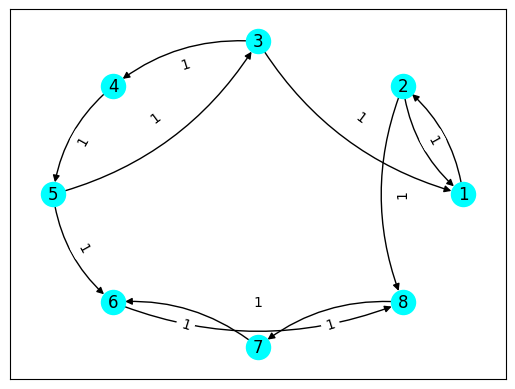

In [0]:
graph = graphConstructor()
graph.add_vertices([1, 2, 3, 4, 5, 6, 7, 8])
edges = {(1, 2), (2, 1), (2, 8), (3, 1), (3, 4), (4, 5), (5, 3), (5, 6), (6, 8), (7, 6), (8, 7)}
graph.add_edges({(u, v) : 1 for u, v in edges})
print(composantes_fortement_connexes(graph))
draw_graph(graph)

In [0]:
def has_cycle(graph) :
    # TODO : détecter s'il existe un cycle dans le graphe.
    return False

In [0]:
def tri_topologique(graph) :
    # TODO : réaliser le tri topologique des sommets d'un graphe.
    return None

Charlie doit s'habiller pour un entretien d'embauche, mais avec le stress, il a peur d'oublier. Il a listé des dépendances pour s'habiller. Il a besoin que vous réalisiez un tri topologique pour lui indiquer l'ordre dans lequel il pourrait se préparer.

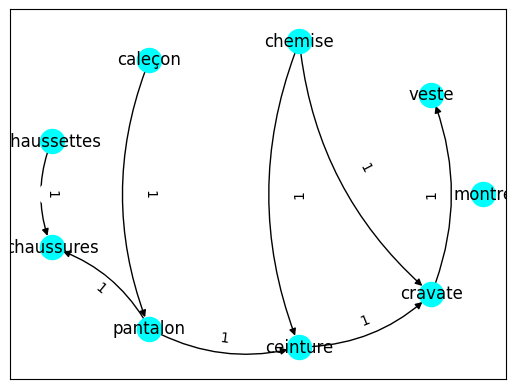

None


In [0]:
graph = graphConstructor()
graph.add_vertices(["montre", "veste", "chemise", "caleçon", "chaussettes", "chaussures", "pantalon", "ceinture", "cravate"])
edges = {("chaussettes", "chaussures"), ("caleçon", "pantalon"), ("pantalon", "chaussures"), ("pantalon", "ceinture"), ("ceinture", "cravate"), ("chemise", "ceinture"), ("chemise", "cravate"), ("cravate", "veste")}
graph.add_edges({e:1 for e in edges})
draw_graph(graph)
print(tri_topologique(graph))

In [0]:
def graphCoursNonConnexe(graphConstructor) :
    graph = graphConstructor()
    graph.add_vertices(set("abcd"))
    graph.add_edges({("a", "b") : 1, ("b", "a") : -1, ("a", "c") : 1, ("c", "c") : 1 / 2, ("d", "d") : 1})
    return graph

def graphCoursAcyclique(graphConstructor) :
    graph = graphConstructor()
    graph.add_vertices(set("abcdefghi"))
    links = {"ab", "ad", "bc", "be", "cf", "de", "dg", "fe", "gh", "he", "if", "ih"}
    graph.add_edges({(k[0], k[1]) : 1 for k in links})
    return graph

def testComputeFlow(graphConstructor) :
    points = 0
    cmpflow = lambda x, y : False if set(x.keys()) != set(y.keys()) else len([1 for k in x if abs(x[k] - y[k]) > 1e-6]) == 0
    graph = graphCoursNonConnexe(graphConstructor)
    flot = {"a" : 1, "b" : 0, "c" : 0, "d" : 1}
    flot = compute_flow(graph, flot)
    points += cmpflow(flot, {"a" : 0, "b" : 0, "b" : 1, "c" : 1, "d" : 1})
    flot = compute_flow(graph, flot)
    points += cmpflow(flot, {"a" : -1, "b" : 0, "c" : 1 / 2, "d" : 1})
    flot = compute_flow(graph, flot)
    points += cmpflow(flot, {"a" : 0, "b" : -1, "c" : -3 / 4, "d" : 1})
    flot = compute_flow(graph, flot)
    points += cmpflow(flot, {"a" : 1, "b" : 0, "c" : -3 / 8, "d" : 1})
    return points / 4 # Ces tests pourront être enrichis pour la validation de votre travail

def testDFS(graphConstructor) :
    points = 0
    DFS = DepthFirstSearch
    graph = graphCoursAcyclique(graphConstructor)
    parcours = DFS(graph, "a")
    points += (parcours in [list("abcfedgh"), list("adeghbcf"), list("abecfdgh"), list("adghebcf")])
    return points / 1 # Ces tests pourront être enrichis pour la validation de votre travail

def testBFS(graphConstructor) :
    points = 0
    BFS = BreadthFirstSearch
    graph = graphCoursAcyclique(graphConstructor)
    parcours = BFS(graph, "a")
    points += (parcours in [list("abdcegfh"), list("abdecgfh"), list("adbgechf"), list("adbegchf")])
    return points / 1 # Ces tests pourront être enrichis pour la validation de votre travail

def testComposantesFortementConnexes(graphConstructor) :
    points = 0
    graph = graphCoursNonConnexe(graphConstructor)
    composantes = composantes_fortement_connexes(graph)
    composantes = {tuple(sorted(list(e))) for e in composantes}
    points += (composantes == {("a", "b"), ("c",), ("d",)})
    graph = graphConstructor()
    graph.add_vertices([1, 2, 3, 4, 5, 6, 7, 8])
    edges = {(1, 2), (2, 1), (2, 8), (3, 1), (3, 4), (4, 5), (5, 3), (5, 6), (6, 8), (7, 6), (8, 7)}
    graph.add_edges({(u, v) : 1 for u, v in edges})
    composantes = composantes_fortement_connexes(graph)
    composantes = {tuple(sorted(list(e))) for e in composantes}
    points += (composantes == {(3, 4, 5), (1, 2), (6, 7, 8)})
    return points / 2 # Ces tests pourront être enrichis pour la validation de votre travail

def testCycles(graphConstructor) :
    points = 0
    points += (has_cycle(graphCoursNonConnexe(graphConstructor)) == True)
    points += (has_cycle(graphCoursAcyclique(graphConstructor)) == False)
    return points / 2 # Ces tests pourront être enrichis pour la validation de votre travail

from itertools import product

def testTriTopologique(graphConstructor) :
    points = 0
    graph = graphCoursAcyclique(graphConstructor)
    possibilites = ['adgbcifhe', 'adgbcihfe', 'adgbicfhe', 'adgbichfe', 'adgbihcfe', 'adgibcfhe', 'adgibchfe', 'adgibhcfe', 'adgihbcfe', 'adbgcifhe', 'adbgcihfe', 'adbgicfhe', 'adbgichfe', 'adbgihcfe', 'adbcgifhe', 'adbcgihfe', 'adbcigfhe', 'adbcighfe', 'adbcifghe', 'adbigcfhe', 'adbigchfe', 'adbighcfe', 'adbicgfhe', 'adbicghfe', 'adbicfghe', 'adigbcfhe', 'adigbchfe', 'adigbhcfe', 'adighbcfe', 'adibgcfhe', 'adibgchfe', 'adibghcfe', 'adibcgfhe', 'adibcghfe', 'adibcfghe', 'abdgcifhe', 'abdgcihfe', 'abdgicfhe', 'abdgichfe', 'abdgihcfe', 'abdcgifhe', 'abdcgihfe', 'abdcigfhe', 'abdcighfe', 'abdcifghe', 'abdigcfhe', 'abdigchfe', 'abdighcfe', 'abdicgfhe', 'abdicghfe', 'abdicfghe', 'abcdgifhe', 'abcdgihfe', 'abcdigfhe', 'abcdighfe', 'abcdifghe', 'abcifdghe', 'abcidgfhe', 'abcidghfe', 'abcidfghe', 'abidgcfhe', 'abidgchfe', 'abidghcfe', 'abidcgfhe', 'abidcghfe', 'abidcfghe', 'abicfdghe', 'abicdgfhe', 'abicdghfe', 'abicdfghe', 'aidgbcfhe', 'aidgbchfe', 'aidgbhcfe', 'aidghbcfe', 'aidbgcfhe', 'aidbgchfe', 'aidbghcfe', 'aidbcgfhe', 'aidbcghfe', 'aidbcfghe', 'aibdgcfhe', 'aibdgchfe', 'aibdghcfe', 'aibdcgfhe', 'aibdcghfe', 'aibdcfghe', 'aibcfdghe', 'aibcdgfhe', 'aibcdghfe', 'aibcdfghe', 'iadgbcfhe', 'iadgbchfe', 'iadgbhcfe', 'iadghbcfe', 'iadbgcfhe', 'iadbgchfe', 'iadbghcfe', 'iadbcgfhe', 'iadbcghfe', 'iadbcfghe', 'iabdgcfhe', 'iabdgchfe', 'iabdghcfe', 'iabdcgfhe', 'iabdcghfe', 'iabdcfghe', 'iabcfdghe', 'iabcdgfhe', 'iabcdghfe', 'iabcdfghe']
    points += (tri_topologique(graph) in map(list, possibilites))
    return points / 1 # Ces tests pourront être enrichis pour la validation de votre travail
    

In [0]:
from AllGraphs import *
graphConstructor = IncidencyGraph
tests = ["testComputeFlow", "testDFS", "testBFS", "testComposantesFortementConnexes", "testCycles", "testTriTopologique"]

points = 0
enableTryCatch = False
for t in tests :
    if enableTryCatch :
        try :
            score = eval(t)(graphConstructor)
        except Exception as e :
            print("ERROR :", e)
            score = 0
    else :
        score = eval(t)(graphConstructor)
    print("%s : %0.f %%" % (t, score * 100))
    points += score
points *= 20 / len(tests)
print("Note : %g / 20" % points)    

testComputeFlow : 0 %
testDFS : 0 %
testBFS : 0 %


TypeError: 'NoneType' object is not iterable